# 🧪 Data Mining Project Lab: Malaria Outbreak Prediction in Cameroon

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn geopandas plotly

In [2]:
!pip install pyogrio


In [3]:
!pip install geopandas


In [4]:
!python -m pip install --upgrade pip


In [5]:
!pip install plotly


## 📁 Step 1: Data Collection

In [6]:
import pandas as pd

# Load the new datasets
iot_df = pd.read_csv("Malaria outbrea Dataset_IoT_generated_and_Epidem.csv")
numerical_df = pd.read_csv("NUMERICAL_____Malaria outbrea Dataset_IoT_generated_and_Epidem.csv")

# Preview the datasets
print("IoT Dataset Preview:")
print(iot_df.head())

print("\nNumerical Dataset Preview:")
print(numerical_df.head())


IoT Dataset Preview:
  temp_level humidity precipitation frequency_outbreak_in_area  \
0        Low     High           Yes                       High   
1       High      Low            No                       High   
2       High     High           Yes                        Low   
3       High      Low           Yes                        Low   
4        Low     High           Yes                       High   

  travel_patterns        mosquito_species malaria_vectors  \
0             Low           Aedes aegypti              No   
1            High       Anopheles gambiae              No   
2            High  Culex quinquefasciatus              No   
3             Low       Anopheles gambiae             Yes   
4             Low           Aedes aegypti             Yes   

  vectors_infection_rates healthcare_availability healthcare_accessibility  \
0                     Low                     Yes                       No   
1                    High                     Yes          

## 🧼 Step 2: Data Preprocessing

In [7]:
# Handle missing values
iot_df.fillna(method='ffill', inplace=True)
numerical_df.fillna(method='ffill', inplace=True)

# Convert date columns if present
# Check if 'Date' column exists before converting
if 'Date' in iot_df.columns:
    iot_df['Date'] = pd.to_datetime(iot_df['Date'], errors='coerce')
if 'Date' in numerical_df.columns:
    numerical_df['Date'] = pd.to_datetime(numerical_df['Date'], errors='coerce')

# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = numerical_df.select_dtypes(include=['float64', 'int64']).columns
numerical_df[numerical_features] = scaler.fit_transform(numerical_df[numerical_features])


C:\Users\JA 12\AppData\Local\Temp\ipykernel_50592\1877357454.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  iot_df.fillna(method='ffill', inplace=True)
C:\Users\JA 12\AppData\Local\Temp\ipykernel_50592\1877357454.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numerical_df.fillna(method='ffill', inplace=True)


## 📊 Step 3: Exploratory Data Analysis (EDA)

In [8]:
print(iot_df.columns)


Index(['temp_level', 'humidity', 'precipitation', 'frequency_outbreak_in_area',
       'travel_patterns', 'mosquito_species', 'malaria_vectors',
       'vectors_infection_rates', 'healthcare_availability',
       'healthcare_accessibility', 'malaria_treatment_success_rates',
       'land_use', 'mosquito_breeding_sites', 'stagnant_waters',
       'iot_air_quality', 'iot_water_quality', 'presence_of_vegetation',
       'outbreak_threshold'],
      dtype='object')


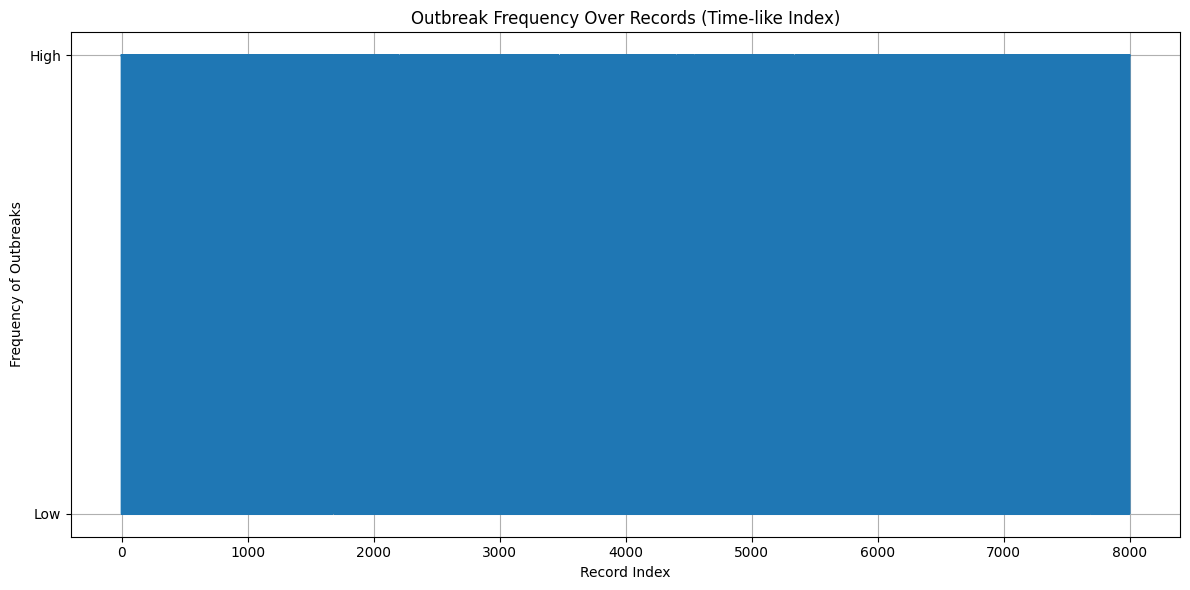

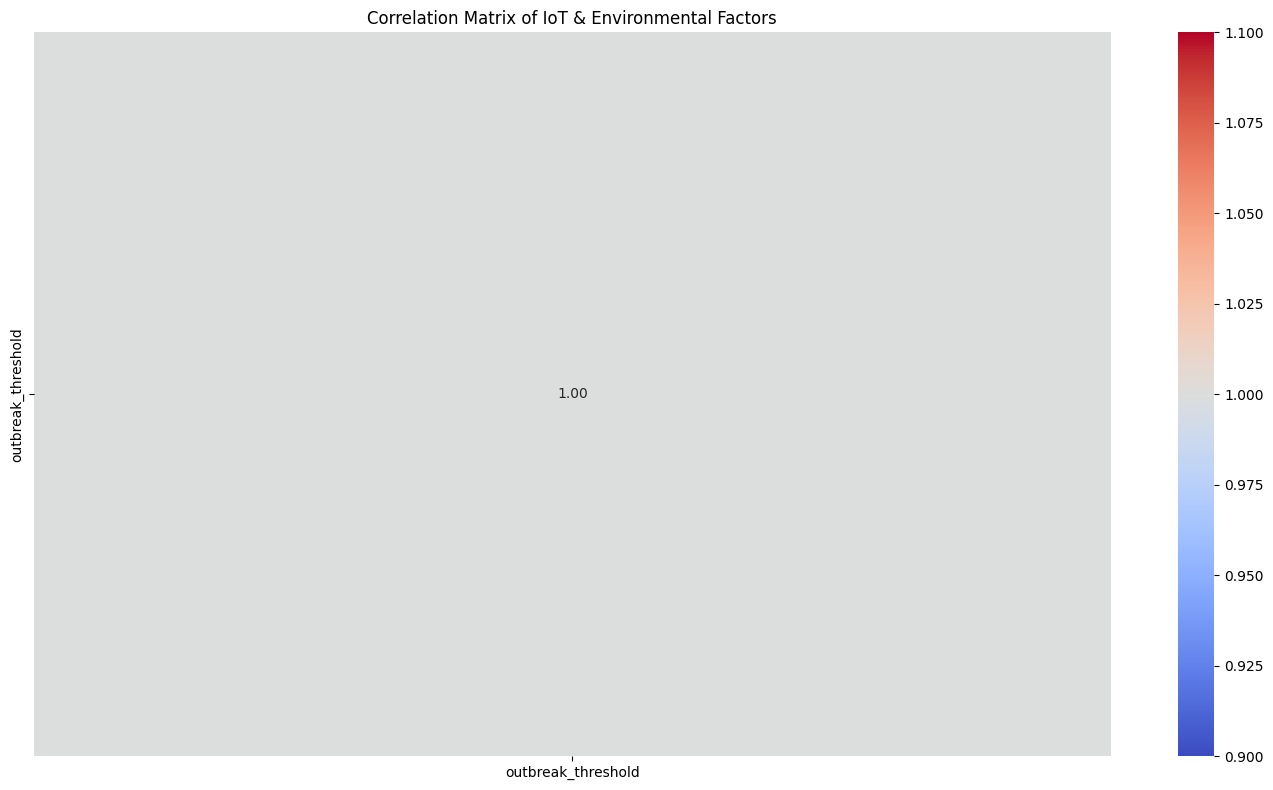

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time series plot of malaria cases
plt.figure(figsize=(12, 6))
sns.lineplot(data=iot_df, y='frequency_outbreak_in_area', x=iot_df.index)
plt.title("Outbreak Frequency Over Records (Time-like Index)")
plt.xlabel("Record Index")
plt.ylabel("Frequency of Outbreaks")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(iot_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of IoT & Environmental Factors")
plt.tight_layout()
plt.show()


## 🧠 Step 4: Modeling
Objective: Train machine learning models to predict malaria outbreaks.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define features and target
features = numerical_df.drop(columns=['frequency_outbreak_in_area'])
target = numerical_df['frequency_outbreak_in_area']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.52      0.49      0.51       802
         1.0       0.52      0.55      0.53       798

    accuracy                           0.52      1600
   macro avg       0.52      0.52      0.52      1600
weighted avg       0.52      0.52      0.52      1600



## 🧪 Step 5: Evaluation


In [56]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [57]:
# Load the GeoJSON file
regions_gdf = gpd.read_file('cm.json')

# Preview the GeoDataFrame
print(regions_gdf.head())


                   source    id          name  \
0  https://simplemaps.com  CMSU           Sud   
1  https://simplemaps.com  CMEN  Extrême-Nord   
2  https://simplemaps.com  CMNO          Nord   
3  https://simplemaps.com  CMAD      Adamaoua   
4  https://simplemaps.com  CMNW    Nord-Ouest   

                                            geometry  
0  POLYGON ((9.92945 3.26902, 9.92966 3.2691, 9.9...  
1  POLYGON ((14.19634 9.97915, 14.19622 9.97934, ...  
2  POLYGON ((13.39267 10.11696, 13.39591 10.11039...  
3  POLYGON ((12.23371 8.18845, 12.24559 8.17733, ...  
4  POLYGON ((11.20228 6.43674, 11.2086 6.38514, 1...  


In [58]:
# Load the malaria dataset
malaria_df = pd.read_csv('Malaria outbrea Dataset_IoT_generated_and_Epidem.csv')

# Preview the DataFrame
print(malaria_df.head())


  temp_level humidity precipitation frequency_outbreak_in_area  \
0        Low     High           Yes                       High   
1       High      Low            No                       High   
2       High     High           Yes                        Low   
3       High      Low           Yes                        Low   
4        Low     High           Yes                       High   

  travel_patterns        mosquito_species malaria_vectors  \
0             Low           Aedes aegypti              No   
1            High       Anopheles gambiae              No   
2            High  Culex quinquefasciatus              No   
3             Low       Anopheles gambiae             Yes   
4             Low           Aedes aegypti             Yes   

  vectors_infection_rates healthcare_availability healthcare_accessibility  \
0                     Low                     Yes                       No   
1                    High                     Yes                      Yes   
2 

In [64]:
import numpy as np

# Assign random regions from the GeoJSON to each malaria row
regions = regions_gdf['name'].unique()
malaria_df['name'] = np.random.choice(regions, size=len(malaria_df))


In [59]:
print(malaria_df.columns)


Index(['temp_level', 'humidity', 'precipitation', 'frequency_outbreak_in_area',
       'travel_patterns', 'mosquito_species', 'malaria_vectors',
       'vectors_infection_rates', 'healthcare_availability',
       'healthcare_accessibility', 'malaria_treatment_success_rates',
       'land_use', 'mosquito_breeding_sites', 'stagnant_waters',
       'iot_air_quality', 'iot_water_quality', 'presence_of_vegetation',
       'outbreak_threshold'],
      dtype='object')


In [60]:
malaria_df = malaria_df.rename(columns={'land_use': 'name'})


In [65]:
# Merge the GeoDataFrame with the malaria DataFrame
merged_gdf = regions_gdf.merge(malaria_df, left_on='name', right_on='name')

# Preview the merged GeoDataFrame
print(merged_gdf.head())


                   source    id name  \
0  https://simplemaps.com  CMSU  Sud   
1  https://simplemaps.com  CMSU  Sud   
2  https://simplemaps.com  CMSU  Sud   
3  https://simplemaps.com  CMSU  Sud   
4  https://simplemaps.com  CMSU  Sud   

                                            geometry temp_level humidity  \
0  POLYGON ((9.92945 3.26902, 9.92966 3.2691, 9.9...       High     High   
1  POLYGON ((9.92945 3.26902, 9.92966 3.2691, 9.9...        Low      Low   
2  POLYGON ((9.92945 3.26902, 9.92966 3.2691, 9.9...       High      Low   
3  POLYGON ((9.92945 3.26902, 9.92966 3.2691, 9.9...        Low      Low   
4  POLYGON ((9.92945 3.26902, 9.92966 3.2691, 9.9...        Low      Low   

  precipitation frequency_outbreak_in_area travel_patterns  \
0           Yes                       High             Low   
1            No                       High             Low   
2            No                       High             Low   
3           Yes                       High            

Visualization

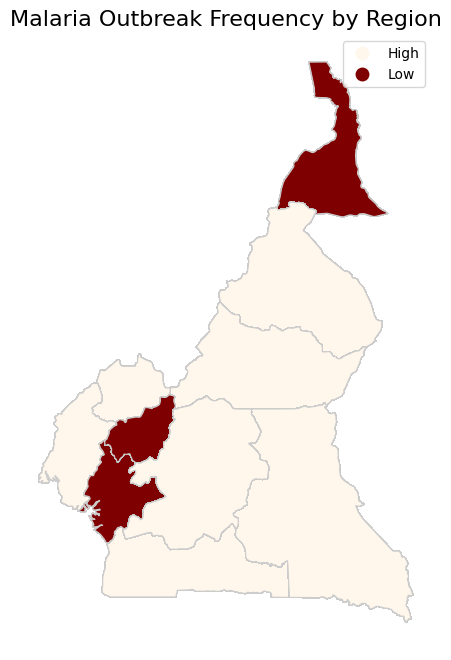

In [66]:
import matplotlib.pyplot as plt

# Merge datasets
merged_gdf = regions_gdf.merge(malaria_df, on='name')

# Plot a choropleth map using one of the malaria-related metrics
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdf.plot(
    column='frequency_outbreak_in_area',  # change this to any relevant column
    cmap='OrRd',
    linewidth=0.8,
    edgecolor='0.8',
    legend=True,
    ax=ax
)

ax.set_title("Malaria Outbreak Frequency by Region", fontdict={'fontsize': 16})
ax.axis('off')
plt.show()
